<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Plot the training data**



*   plot the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)


1. Training Data

* load the training data file ('data-nonlinear.txt')
* each row {(x(i),y(i),l(i))} of the data consists of a 2-dimensional point (x,y)(x, y)(x,y) with its label lll


* x,y∈R and l∈{0,1}



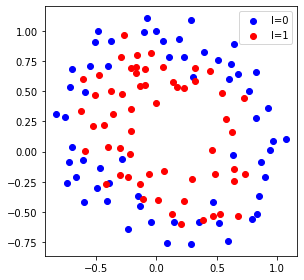

In [349]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment7/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1",c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


#**2. Plot the training error with varying regularization parameters**



* choose a value for λ1​ in such a way that over-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in red color) 
* choose a value for λ2​ in such a way that just-right is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in green color) 
* choose a value for λ3 in such a way that under-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color) 
* the above three curves should be presented all together in a single figure


2. Logistic regression



$ θ=(θ0,0​,θ0,1​,⋯,θ9,9​)$


$z = g(x,y;θ)=∑i09​∑j=09​ θi,j​xiyj $

In [0]:
f=[]
a = 1.01
for i in range(100):
  f.append(a)
  a-=0.01
theta_k=np.array(f)

z=0
k=0
for i in range(10):
  for j in range(10):
    z+=theta_k[k] * (x**i * y**j)
    k+=1

t=[]
for i in range(10):
  for j in range(10):
    t.append(x**i * y**j)
xi_yj = np.array(t)

OF_facts=[theta_k,x,y,xi_yj]

n_theta = len(theta_k)

$ sigmoid : σ(z)=1/(1+exp(−z)) $

In [0]:
sigmoid = 1/(1+np.exp(-z))

3. Objective Function

OF = objective function = 


$ J(θ)=m1​∑i=1m​[−l(i)log(σ(g(x(i),y(i);θ)))−(1−l(i))log(1−σ(g(x(i),y(i);θ)))]+2λ​∑i=09​∑j=09​θi,j2​ $

* the degree of regularization is determined by the control parameter λ\lambdaλ

* the larger value of λ yields smoother classification boundary

* smaller λ_1 , over fitting

* proper λ_2 , just right fitting

* bigger λ_3 , under fitting



4. Gradient Descent

$ θi,j(t+1)​:=θi,j(t)​−α[m1​∑i=1m​(σ(g(x(i),y(i);θ(t)))−l(i))∂θi,j​∂g(x(i),y(i);θ(t))​+λθi,j(t)​], for all i,j $

m = number of data

steps = 10000 번의 학습 사이클. 

learning_rate = 0.1

In [0]:
m = len(x)
steps = 10000
learning_rate = 0.1

gradient_facts=[m,steps,learning_rate]

In [0]:
from sympy import Derivative, symbols

accuracy_facts=[x_label0,x_label1]

real_label_0 = len(x_label0)
real_label_1 = len(x_label1)

def Gradient_func(gradient_facts, OF_facts, accuracy_facts, lambda_k,order):
  print(lambda_k[order])

  # 사용할 요소 정리
  m = gradient_facts[0]
  steps = gradient_facts[1]
  learning_rate = gradient_facts[2]

  theta_k = OF_facts[0]
  x = OF_facts[1]
  y = OF_facts[2]
  xi_yj = OF_facts[3]

  x_label0 = accuracy_facts[0]
  x_label1 = accuracy_facts[1]

  # theta, OF, gradient_theta 배열 선언 및 초기화

  lambda_theta=[]
  for a in range(n_theta):
    lambda_theta.append(0)
  

  arr_theta_k=[]

  for i in range(steps):
    arr_theta_k.append([])

  arr_OF=[]

  gradient_theta_k=[]

  i=0
  for i in range(n_theta):
    gradient_theta_k.append(0)

  # accuracy 위한 label 배열 설정

  accuracy_rate_arr = []

  # OF 계산
  i=0
  j=0
  k=0

  for i in range(steps):
    a=0
    z=0
    for j in range(10):
      for k in range(10):
        z+=theta_k[a] * (x**j * y**k)
        a+=1
    
    sigmoid = 1/(1+np.exp(-z))

    OF = np.sum((-label * np.log10(sigmoid)) - ((1-label) * np.log10(1-sigmoid)))/(m) + lambda_k[order]/2 * np.sum(theta_k**2)

    #OF = np.sum((-label * np.log10(sigmoid)) - ((1-label) * np.log10(1-sigmoid)))/(m)

    arr_OF.append(OF)

    # accuracy 계산

    z_label_1=[]
    z_label_0=[]

    b=0
    for b in range(len(z)):
      if(z[b]>=0):
        z_label_1.append(z[b])
      else:
        z_label_0.append(z[b])

    prediction_label_0 = len(z_label_0)
    prediction_label_1 = len(z_label_1)
    total_prediction = prediction_label_0 + prediction_label_1

    gap_label_0 = abs(real_label_0 - prediction_label_0)
    gap_label_1 = abs(real_label_1 - prediction_label_1)

    total_gap = gap_label_0 + gap_label_1
    
    correct_predictions = total_prediction - total_gap

    accuracy_rate = correct_predictions / total_prediction * 100

    accuracy_rate_arr.append(accuracy_rate)

    # gradident 계산

    c=0
    for c in range(n_theta):
      gradient_theta_k[c]=np.sum((sigmoid - label) * xi_yj[c])/m

    for i in range(n_theta):
      arr_theta_k[i].append(theta_k[i])
    
    for i in range(n_theta):
      lambda_theta[i] = theta_k[i]
    
    # arr_theta_k[i].append(theta_k)

    d=0
    for d in range(n_theta):
      theta_k[d] = -learning_rate * gradient_theta_k[d] + (1-learning_rate*lambda_k[order]) * theta_k[d]
  
      # theta_k[i] += -learning_rate * gradient_theta_k[i] + (1-learning_rate*lambda_k[order]/m) * gradient_theta_k[i]
  
  return [arr_OF,accuracy_rate_arr,accuracy_rate,theta_k,lambda_theta]

In [0]:
lambda_k = [0.00005, 0.001, 0.01]

In [355]:
lambda_1_result = Gradient_func(gradient_facts, OF_facts, accuracy_facts, lambda_k,0)
lambda_2_result = Gradient_func(gradient_facts, OF_facts, accuracy_facts, lambda_k,1)
lambda_3_result = Gradient_func(gradient_facts, OF_facts, accuracy_facts, lambda_k,2)

lambda_1_arr_OF = lambda_1_result[0]
lambda_1_accuracy_rate_arr = lambda_1_result[1]
lambda_1_accuracy_rate = lambda_1_result[2]
lambda_1_theta_k = lambda_1_result[4]

lambda_2_arr_OF = lambda_2_result[0]
lambda_2_accuracy_rate_arr = lambda_2_result[1]
lambda_2_accuracy_rate = lambda_2_result[2]
lambda_2_theta_k = lambda_2_result[4]

lambda_3_arr_OF = lambda_3_result[0]
lambda_3_accuracy_rate_arr = lambda_3_result[1]
lambda_3_accuracy_rate = lambda_3_result[2]
lambda_3_theta_k = lambda_3_result[4]

5e-05
0.001
0.01


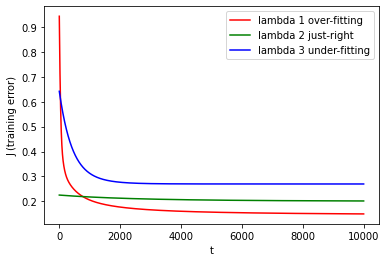

In [356]:
lambda_1_training_err=np.array(lambda_1_arr_OF,dtype=float)
lambda_2_training_err=np.array(lambda_2_arr_OF,dtype=float)
lambda_3_training_err=np.array(lambda_3_arr_OF,dtype=float)

t=np.arange(0,10000,step=1)

plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,lambda_1_training_err,color="red",label="lambda 1 over-fitting")
plt.plot(t,lambda_2_training_err,color="green",label="lambda 2 just-right")
plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

#**3. Display the values of the chosen regularization parameters**

* display the value of the chosen λ1 for the demonstration of over-fitting (in red color) 
* display the value of the chosen λ2 for the demonstration of just-right (in green color) 
* display the value of the chosen λ3​ for the demonstration of under-fitting (in blue color) 

In [357]:
from termcolor import colored

print(colored(lambda_k[0], 'red'))
print(colored(lambda_k[1], 'green'))
print(colored(lambda_k[2], 'blue'))

5e-05
0.001
0.01


#**4. Plot the training accuracy with varying regularization parameters**

* plot the training accuracy with the chosen λ1 for over-fitting at every iteration of gradient descent until convergence (in red color)
* plot the training accuracy with the chosen λ2​ for just-right at every iteration of gradient descent until convergence (in green color)
* plot the training accuracy with the chosen λ3​ for under-fitting at every iteration of gradient descent until convergence (in blue color)
* the above three curves should be presented all together in a single figure

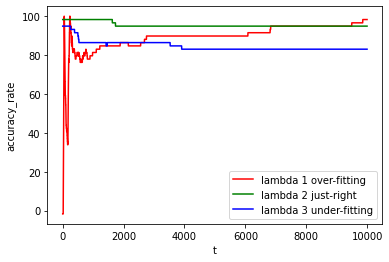

In [358]:
lambda_1_accuracy_rate=np.array(lambda_1_accuracy_rate_arr,dtype=float)
lambda_2_accuracy_rate=np.array(lambda_2_accuracy_rate_arr,dtype=float)
lambda_3_accuracy_rate=np.array(lambda_3_accuracy_rate_arr,dtype=float)

t=np.arange(0,10000,step=1)

plt.xlabel('t')
plt.ylabel('accuracy_rate')

plt.plot(t,lambda_1_accuracy_rate,color="red",label="lambda 1 over-fitting")
plt.plot(t,lambda_2_accuracy_rate,color="green",label="lambda 2 just-right")
plt.plot(t,lambda_3_accuracy_rate,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

#**5. Display the final training accuracy with varying regularization parameters**

* display the final training accuracy obtained with the chosen λ1​ for over-fitting in number (%) at convergence (in red color)
* display the final training accuracy obtained with the chosen λ2​ for just-right in number (%) at convergence (in green color) 
* display the final training accuracy obtained with the chosen λ3 for under-fitting in number (%) at convergence (in blue color)


In [359]:
print(colored(lambda_1_accuracy_rate[9999], 'red'))
print(colored(lambda_2_accuracy_rate[9999], 'green'))
print(colored(lambda_3_accuracy_rate[9999], 'blue'))

98.30508474576271
94.91525423728814
83.05084745762711


#**6. Plot the optimal classifier with varying regularization parameters superimposed on the training data**

* plot the boundary of the optimal classifier with the chosen λ1 for over-fitting at convergence (in red color) 
* plot the boundary of the optimal classifier with the chosen λ2​ for just-right at convergence (in green color)
* plot the boundary of the optimal classifier with the chosen λ3 for under-fitting at convergence (in blue color) 
* the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}

* the boundaries of the classifiers with different regularization parameters should be presented with the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)
* you can use contour function in python3

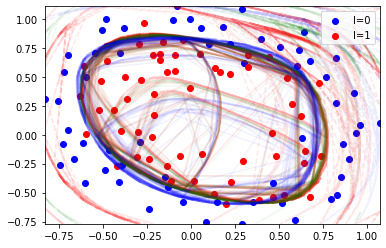

In [360]:
X,Y = np.meshgrid(x,y)

lambda_1_OC = 0
lambda_2_OC = 0
lambda_3_OC = 0

a=0
for j in range(10):
  for k in range(10):
    lambda_1_OC += lambda_1_theta_k[a] * (X**j * Y**k)
    lambda_2_OC += lambda_2_theta_k[a] * (X**j * Y**k)
    lambda_3_OC += lambda_3_theta_k[a] * (X**j * Y**k)
    a+=1

contour1 = plt.contour(x, y, lambda_1_OC, levels=4, colors="red",alpha=0.09)
contour2 = plt.contour(x, y, lambda_2_OC, levels=4, colors="green",alpha=0.05)
contour3 = plt.contour(x, y, lambda_3_OC, levels=4, colors="blue",alpha=0.05)

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1", c='r')

plt.legend()
plt.show()

#**Result**

##**1. Plot the training data**

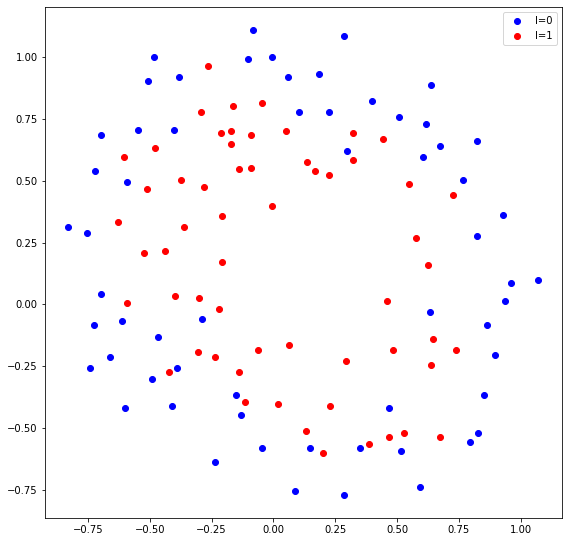

In [361]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1",c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

plt.legend()
plt.show()

##**2. Plot the training error with varying regularization parameters**

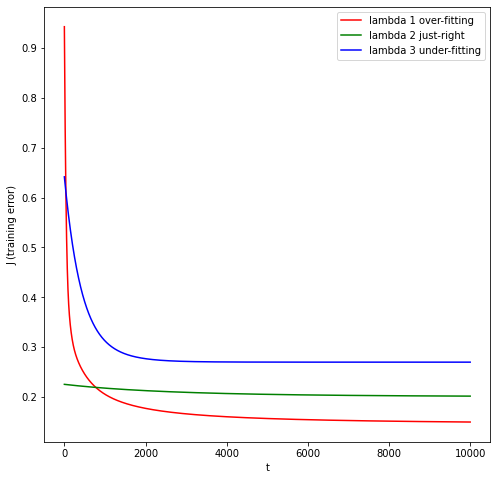

In [368]:
t=np.arange(0,10000,step=1)

plt.figure(figsize=(8, 8))

plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,lambda_1_training_err,color="red",label="lambda 1 over-fitting")
plt.plot(t,lambda_2_training_err,color="green",label="lambda 2 just-right")
plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

##**3. Display the values of the chosen regularization parameters**

In [373]:
print(colored(lambda_k[0], 'red'))
print(colored(lambda_k[1], 'green'))
print(colored(lambda_k[2], 'blue'))

5e-05
0.001
0.01


##**4. Plot the training accuracy with varying regularization parameters**

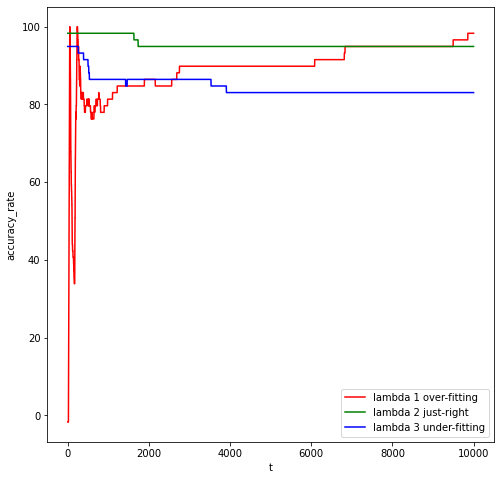

In [377]:
t=np.arange(0,10000,step=1)

plt.figure(figsize=(8, 8))

plt.xlabel('t')
plt.ylabel('accuracy_rate')

plt.plot(t,lambda_1_accuracy_rate,color="red",label="lambda 1 over-fitting")
plt.plot(t,lambda_2_accuracy_rate,color="green",label="lambda 2 just-right")
plt.plot(t,lambda_3_accuracy_rate,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

##**5. Display the final training accuracy with varying regularization parameters**

In [0]:
# print(colored(lambda_1_accuracy_rate[9999], 'red'))
# print(colored(lambda_2_accuracy_rate[9999], 'green'))
# print(colored(lambda_3_accuracy_rate[9999], 'blue'))

##**6. Plot the optimal classifier with varying regularization parameters superimposed on the training data**

In [0]:
# plt.figure(figsize=(10, 10))

# contour1 = plt.contour(x, y, lambda_1_OC, levels=4, colors="red",alpha=0.12)
# contour2 = plt.contour(x, y, lambda_2_OC, levels=4, colors="green",alpha=0.07)
# contour3 = plt.contour(x, y, lambda_3_OC, levels=4, colors="blue",alpha=0.045)

# plt.scatter(x_label0, y_label0,label="l=0", c='b')
# plt.scatter(x_label1, y_label1,label="l=1", c='r')

# plt.legend()
# plt.show()